# Project Title with Algorithm Used

# 1.Goal

# 1.1 Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# 2.Data

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("traffic_data .csv")
data.head()

,Traffic_Volume,Vehicle_Speed,Temperature,Precipitation,Wind_Speed,Bus_Ridership,Train_Ridership,Signal_Timings,Parking_Availability,Air_Quality_PM25,Air_Quality_NO2,Carbon_Emissions
0,237,35,-5,9.969994,20,55,0,76,0,17,41,256
1,836,24,39,2.583402,10,17,1,80,1,66,26,136
2,142,70,8,8.213063,4,96,44,57,1,40,32,692
3,833,35,2,6.105646,5,4,38,84,1,22,37,932
4,221,57,11,5.656482,23,72,9,100,0,24,20,419


# 2.1 Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Read the data
df = pd.read_csv("traffic_data .csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Feature Scaling
scaler = StandardScaler()
numerical_features = ['Traffic_Volume', 'Vehicle_Speed', 'Temperature', 'Precipitation', 
                      'Wind_Speed', 'Bus_Ridership', 'Train_Ridership', 'Signal_Timings',
                      'Air_Quality_PM25', 'Air_Quality_NO2', 'Carbon_Emissions']
df_filled[numerical_features] = scaler.fit_transform(df_filled[numerical_features])

# One-Hot Encoding (if there are categorical variables)
# Assuming Parking_Availability is a categorical variable
# If it's binary, you might skip this step
one_hot_encoder = OneHotEncoder()
parking_encoded = one_hot_encoder.fit_transform(df_filled[['Parking_Availability']])
parking_encoded_df = pd.DataFrame(parking_encoded.toarray(), columns=['Parking_Availability_0', 'Parking_Availability_1'])
df_filled = pd.concat([df_filled, parking_encoded_df], axis=1)
df_filled.drop(['Parking_Availability'], axis=1, inplace=True)

# Splitting Data
X = df_filled.drop(['Traffic_Volume'], axis=1)  # Drop the target column
y = df_filled['Traffic_Volume']  # Set the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have preprocessed data ready for modeling


Missing Values:
Traffic_Volume          0
Vehicle_Speed           0
Temperature             0
Precipitation           0
Wind_Speed              0
Bus_Ridership           0
Train_Ridership         0
Signal_Timings          0
Parking_Availability    0
Air_Quality_PM25        0
Air_Quality_NO2         0
Carbon_Emissions        0
dtype: int64


# A.Check For Duplicates
    

In [4]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Optionally, you can print the duplicate rows
if duplicates.sum() > 0:
    print("Duplicate Rows:")
    print(df[duplicates])



Number of duplicate rows: 0


# B.Check for Null Values

In [5]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)


Null Values:
Traffic_Volume          0
Vehicle_Speed           0
Temperature             0
Precipitation           0
Wind_Speed              0
Bus_Ridership           0
Train_Ridership         0
Signal_Timings          0
Parking_Availability    0
Air_Quality_PM25        0
Air_Quality_NO2         0
Carbon_Emissions        0
dtype: int64


# EDA

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv("traffic_data .csv")

# Summary Statistics
summary_stats = df.describe()
print(summary_stats)



       Traffic_Volume  Vehicle_Speed  Temperature  Precipitation   Wind_Speed  \
count     3000.000000    3000.000000  3000.000000    3000.000000  3000.000000   
mean       546.196333      50.014333    13.780667       5.036627    14.681000   
std        261.019719      17.331809    14.529175       2.901611     8.641265   
min        100.000000      20.000000   -10.000000       0.007234     0.000000   
25%        315.000000      35.000000     1.000000       2.549392     7.000000   
50%        549.500000      50.000000    13.000000       5.034335    15.000000   
75%        772.000000      65.000000    26.000000       7.576086    22.000000   
max        999.000000      79.000000    39.000000       9.997337    29.000000   

       Bus_Ridership  Train_Ridership  Signal_Timings  Parking_Availability  \
count    3000.000000      3000.000000     3000.000000           3000.000000   
mean       48.573333        24.640000       75.567667              0.494000   
std        29.033124        14.31

# 3.1 Analysis of Features

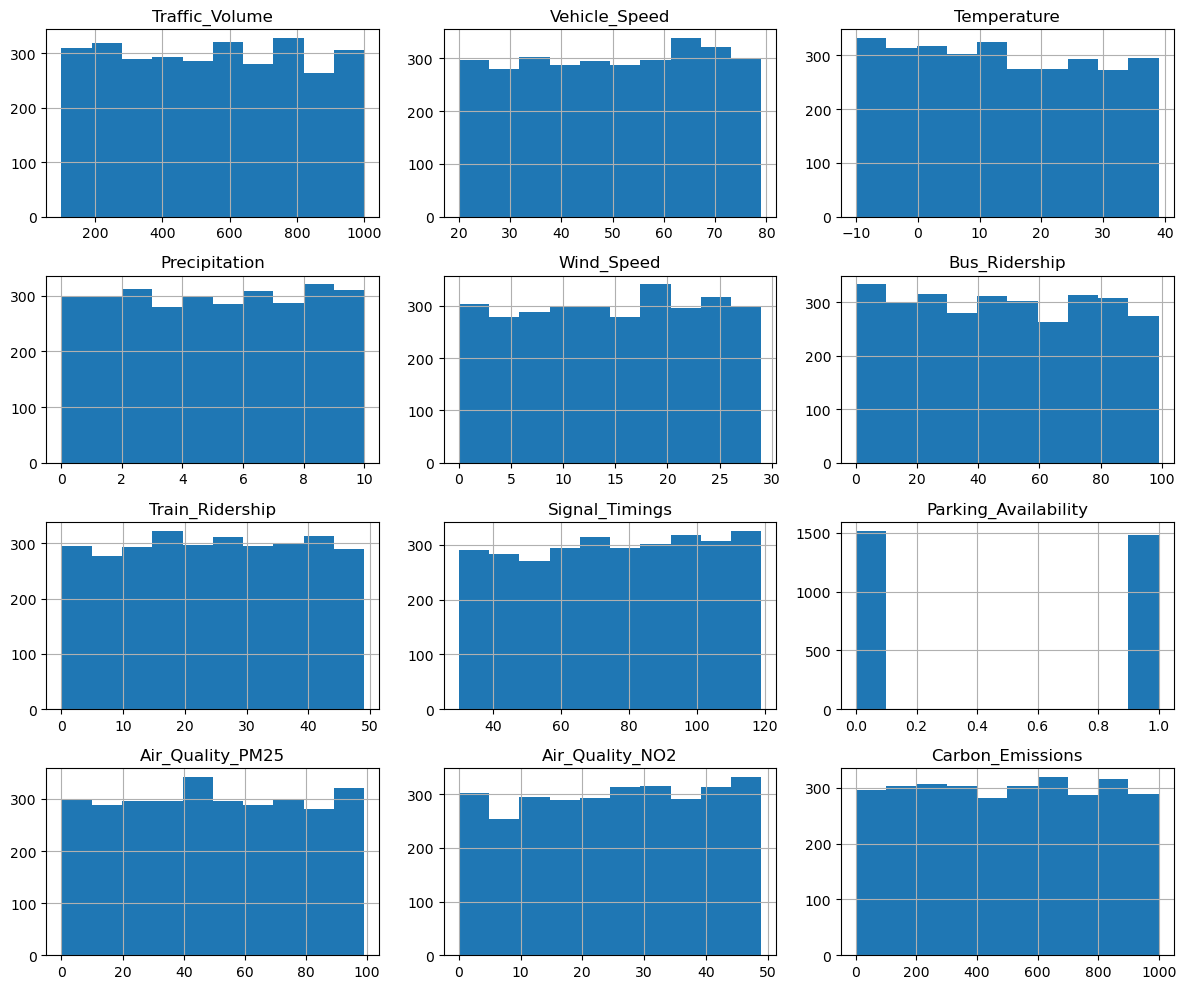

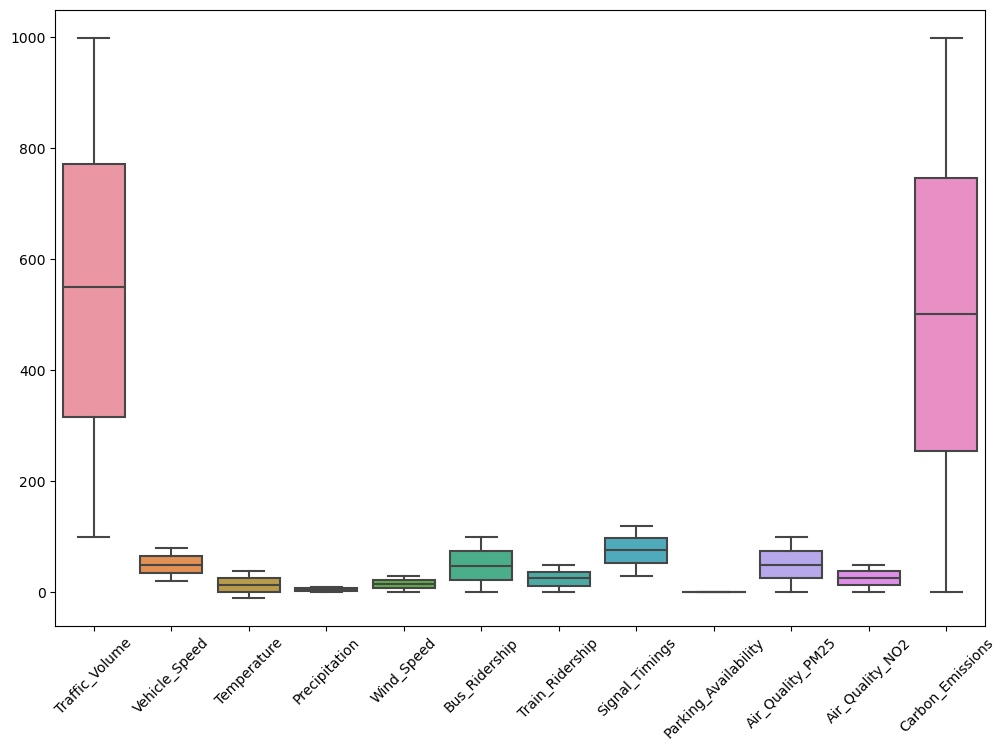

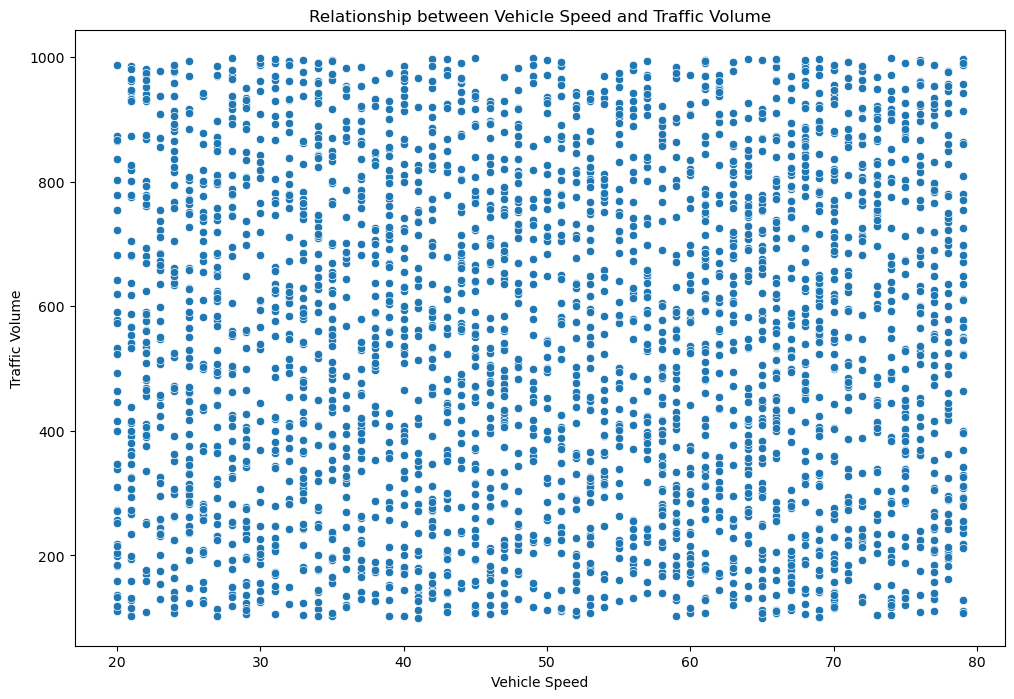

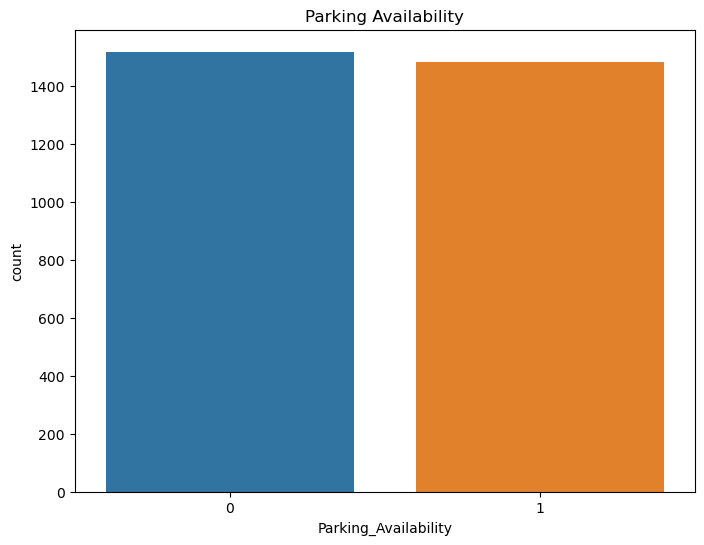

In [7]:
# Data Visualization
# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

#  Feature Analysis
# Example: Explore the relationship between traffic volume and other features
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Vehicle_Speed', y='Traffic_Volume', data=df)
plt.xlabel("Vehicle Speed")
plt.ylabel("Traffic Volume")
plt.title("Relationship between Vehicle Speed and Traffic Volume")
plt.show()

#  Categorical Variables
# Example: Bar plot for Parking Availability
plt.figure(figsize=(8, 6))
sns.countplot(x='Parking_Availability', data=df)
plt.title("Parking Availability")
plt.show()


# 3.2 Correlation Matrix

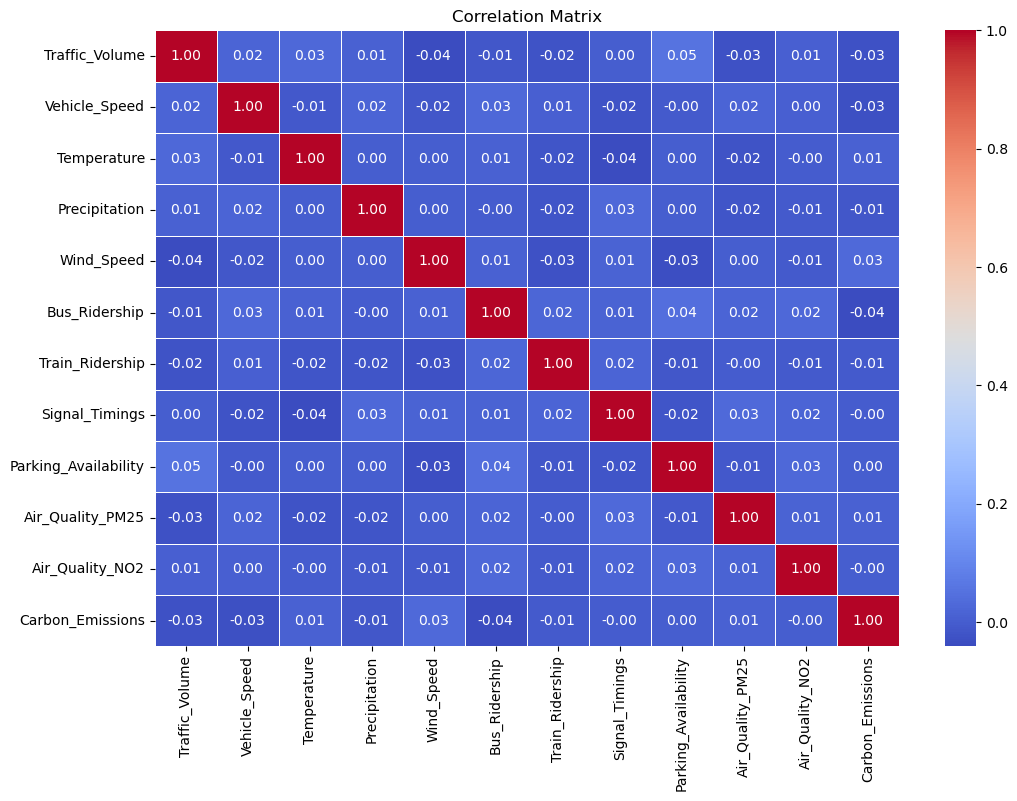

In [8]:
# Correlation matrix and heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# 4.Model Comparison

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined
# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)

# Train Random Forest Regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)

# Compare the performance
print("Linear Regression MSE:", linear_reg_mse)
print("Random Forest Regression MSE:", rf_reg_mse)


Linear Regression MSE: 1.0264743159623622
Random Forest Regression MSE: 1.0492823579254718


In [10]:
from sklearn.metrics import mean_squared_error

# Compute MSE for Linear Regression model
mse_linear_reg = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression MSE:", mse_linear_reg)

# Compute MSE for Random Forest Regression model
mse_rf_reg = mean_squared_error(y_test, rf_reg_pred)
print("Random Forest Regression MSE:", mse_rf_reg)


Linear Regression MSE: 1.0264743159623622
Random Forest Regression MSE: 1.0492823579254718


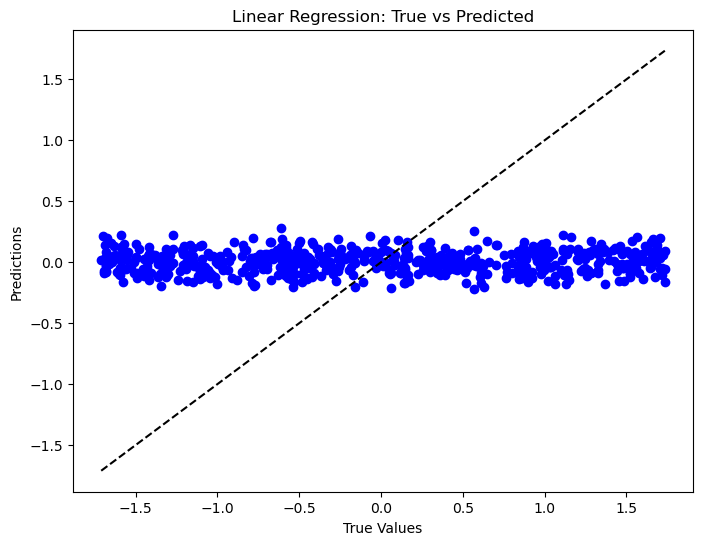

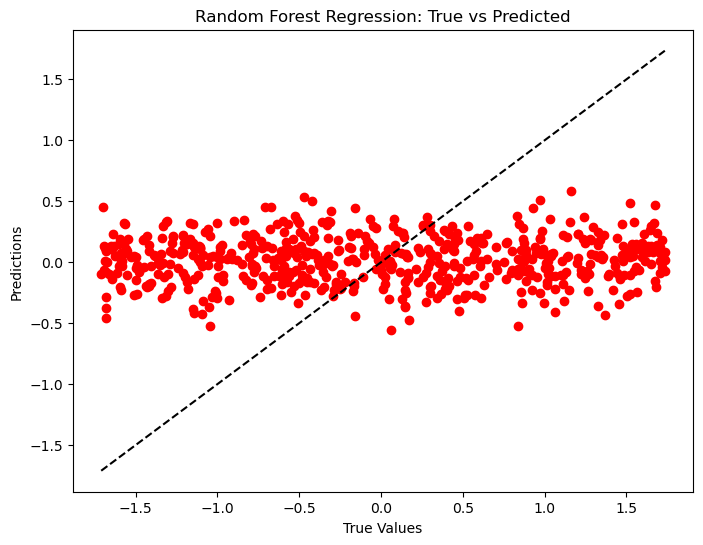

In [11]:
# Plot predicted vs true values for Linear Regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_reg_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True vs Predicted')
plt.show()

# Plot predicted vs true values for Random Forest Regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_reg_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression: True vs Predicted')
plt.show()


# 5.Final Model For Deployment

In [12]:
import joblib
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('traffic_data .csv')

# Define features
features = ['Traffic_Volume', 'Vehicle_Speed', 'Temperature', 'Precipitation', 'Wind_Speed', 
            'Bus_Ridership', 'Train_Ridership', 'Signal_Timings', 'Parking_Availability', 
            'Air_Quality_PM25', 'Air_Quality_NO2', 'Carbon_Emissions']

# Ask user for input for each feature
sample_input = []
for feature in features:
    value = input(f"Enter value for {feature}: ")
    sample_input.append(int(value) if feature != 'Precipitation' else float(value))  # Convert to int or float

# Convert the input to a pandas DataFrame
sample_data = pd.DataFrame([sample_input], columns=features)

# Define target variable (assumed diversion needed if traffic volume is high)
data['Diversion_Needed'] = np.where(data['Traffic_Volume'] > 700, 1, 0)

# Define features and target variable
X = data[features]
y = data['Diversion_Needed']

# Train Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X, y)

# Predict on the sample data
diversion_prediction = lr_classifier.predict(sample_data)[0]

# Interpret the prediction
if diversion_prediction == 1:
    print("Traffic volume is high. Diversion recommended.")
else:
    print("No need for diversion. Traffic volume is manageable.")

# Save the trained model to a joblib file
joblib.dump(lr_classifier, 'logistic_regression_model.joblib')


Enter value for Traffic_Volume: 800
Enter value for Vehicle_Speed: 90
Enter value for Temperature: 89
Enter value for Precipitation: 90
Enter value for Wind_Speed: 90
Enter value for Bus_Ridership: 90
Enter value for Train_Ridership: 23
Enter value for Signal_Timings: 23
Enter value for Parking_Availability: 3
Enter value for Air_Quality_PM25: 3
Enter value for Air_Quality_NO2: 3
Enter value for Carbon_Emissions: 3
No need for diversion. Traffic volume is manageable.


C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.joblib']

# 6.Sample Datas to Test the Model

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('traffic_data .csv')

# Define features
features = ['Traffic_Volume', 'Vehicle_Speed', 'Temperature', 'Precipitation', 'Wind_Speed', 
            'Bus_Ridership', 'Train_Ridership', 'Signal_Timings', 'Parking_Availability', 
            'Air_Quality_PM25', 'Air_Quality_NO2', 'Carbon_Emissions']

# Ask user for input for each feature
sample_input = []
for feature in features:
    value = input(f"Enter value for {feature}: ")
    sample_input.append(int(value) if feature != 'Precipitation' else float(value))  # Convert to int or float

# Convert the input to a pandas DataFrame
sample_data = pd.DataFrame([sample_input], columns=features)

# Define target variable (assumed diversion needed if traffic volume is high)
data['Diversion_Needed'] = np.where(data['Traffic_Volume'] > 700, 1, 0)

# Define features and target variable
X = data[features]
y = data['Diversion_Needed']

# Train Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X, y)

# Predict on the sample data
diversion_prediction = lr_classifier.predict(sample_data)[0]

# Interpret the prediction
if diversion_prediction == 1:
    print("Traffic volume is high. Diversion recommended.")
else:
    print("No need for diversion. Traffic volume is manageable.")


Enter value for Traffic_Volume: 3
Enter value for Vehicle_Speed: 45
Enter value for Temperature: 45
Enter value for Precipitation: 45
Enter value for Wind_Speed: 4
Enter value for Bus_Ridership: 5
Enter value for Train_Ridership: 90
Enter value for Signal_Timings: 89
Enter value for Parking_Availability: 78
Enter value for Air_Quality_PM25: 87
Enter value for Air_Quality_NO2: 19
Enter value for Carbon_Emissions: 24
No need for diversion. Traffic volume is manageable.


C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
